Based on: https://www.datatechnotes.com/2019/07/regression-example-with.html 

# The Data Set We Will Use

In [29]:
from sklearn.datasets import load_boston

boston = load_boston()

x, y = boston.data, boston.target

print('Shape X:','\n',x.shape)

print('Shape y:','\n',y.shape)

Shape X: 
 (506, 13)
Shape y: 
 (506,)


# Splitting the Data Set Into Training Data and Test Data

In [30]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)

# Training The AdaBoost Model

In [31]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(n_estimators=100)

ada_reg.fit(xtrain, ytrain)

AdaBoostRegressor(n_estimators=100)

# Cross-validating the AdaBoost Model

In [32]:
from sklearn.model_selection import cross_val_score, KFold

scores = cross_val_score(ada_reg, xtrain ,ytrain,cv=5)

print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.81


K-fold Explanation: https://towardsdatascience.com/k-fold-cross-validation-explained-in-plain-english-659e33c0bc0 

In [33]:
kfold = KFold(n_splits=10, shuffle=True)

kf_cv_scores = cross_val_score(ada_reg, xtrain, ytrain, cv=kfold )

print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.78


# Making Predictions With Our AdaBoost Model

In [34]:
ypred = ada_reg.predict(xtest)

# Assessing the Performance of our AdaBoost Model

In [35]:
from sklearn.metrics import mean_squared_error

import numpy as np

mse = mean_squared_error(ytest,ypred)

print("MSE: %.2f" % mse)

print("RMSE: %.2f" % np.sqrt(mse))

MSE: 13.42
RMSE: 3.66


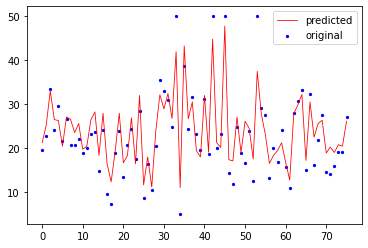

In [36]:
import matplotlib.pyplot as plt

x_ax = range(len(ytest))

plt.scatter(x_ax, ytest, s=5, color="blue", label="original")

plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")

plt.legend()

plt.show()